<h1> <center> <font color="green"> Logistic Regression </center></h2>

<center><img src="pics/logistic.jpeg" width=800 height=400></center>

<h2> <font color="blue"> Pros </h2>

1. Easy to undestnad. 
2. Can model linear type of relationship very well.
3. Do not has <b>assumptions</b> like "linear" regression.

<h2><font color = "red"> Cons </h2>

<h2> <font color="green"> How it Works !! </h2>

<h2> Implementation </h2>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
credit = pd.read_csv('/Users/bt/Documents/GITHUB/creditcard.csv')
credit.drop('Time', axis=1, inplace=True)

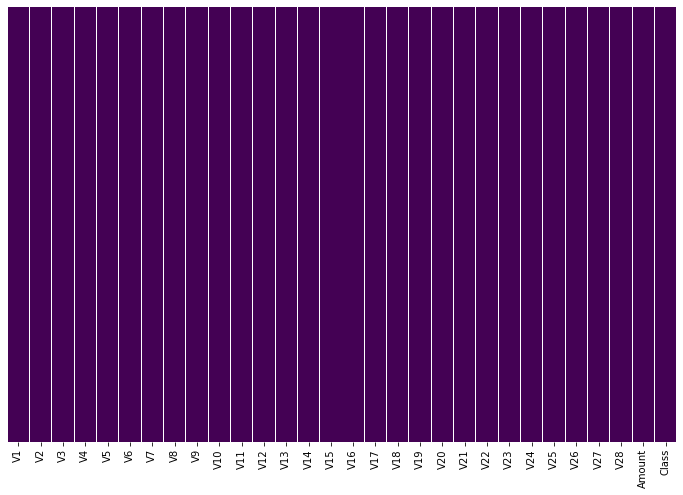

In [16]:
# Check missing data
plt.figure(figsize=(12,8))
sns.heatmap(credit.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

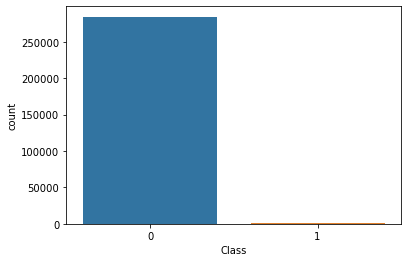

In [20]:
# Highly unbalanced dataset
sns.countplot(x='Class', data=credit)
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler